# Examples
We will now perform our first predictions. Consider [this data set](https://drive.google.com/file/d/13HPgfc4HP9UP-gHM2lutJ7MXSt-dAL1d/view?usp=sharing) which tracks various information about grad school applicants, as well as their percentage chance of admission to grad school.

Our aim will be to predict one's chance of getting into grad school. Let's begin by taking a look at the data


In [55]:
import numpy as np
import pandas as pd
import seaborn as sns

#load the data
data = pd.read_csv('data/uni_admission.csv')

#displaying the dataset
data.shape

(500, 9)

You should see 500 entries, and 9 columns. Let's also get a description of the data

In [56]:
data.describe()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Let's start by focusing on a single variable: the GRE score 

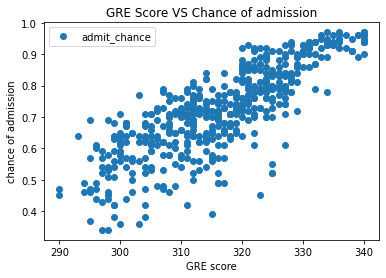

In [57]:
import matplotlib.pyplot as plt

data.plot(x='GRE', y='admit_chance', style='o')
plt.title('GRE Score VS Chance of admission')
plt.xlabel('GRE score')
plt.ylabel('chance of admission')
plt.show()



We can clearly see that there is a relationship between GRE scores and chances of admission. While there are some outliers, we will now build a linear regression model to predict admission chance based on GRE results. First, we set up our train and test datasets

In [58]:
from sklearn.model_selection import train_test_split

X = data['GRE'].values.reshape(-1, 1) #WHy are we reshaping 
y = data['admit_chance'].values#.reshape(-1, 1)

# Use 20% of the data as test
# The rest will be our training set
GRE_train, GRE_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)



This should be familiar so far, time to actually create the model. We will create a regressor object, and train it using our train data

In [59]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(GRE_train, admit_train)

#The fit method will look for our optimal line. More info on this method and others
# at the official documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

-2.548812692408458
[0.01033718]


How good is our newly fitted model? Let's feed it the data we saved for testing. We will have the model predict chances of admission based on those GRE scores we set aside, then compare that to the actual chances from the original dataset.

In [60]:
admit_predict = regressor.predict(GRE_test)

comparison_frame = pd.DataFrame({'Actual': admit_test.flatten(), 'Predicted': admit_predict.flatten()})

comparison_frame.describe()
  

,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.706884
std,0.13282,0.115189
min,0.39000,0.500657
25%,0.60000,0.614366
50%,0.70500,0.717738
75%,0.80000,0.800435
max,0.96000,0.945156


Our model is not too bad, although you can see that it can be off, as with the min value. Let's visualize it for a better intuition

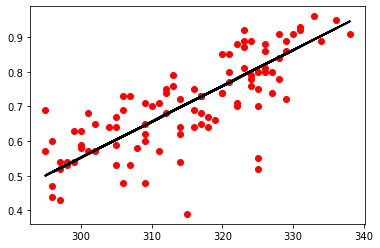

In [61]:
plt.scatter(GRE_test, admit_test, color='red')
plt.plot(GRE_test, admit_predict, color='black', linewidth=2)
plt.show()

We have some outliers, but our line is nicely centered. While visualizations like this are helpful in assessing our line of best fit, sklearn comes with some crucial metrics for linear regressions

In [62]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(admit_test, admit_predict))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(admit_test, admit_predict))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(admit_test, admit_predict)))  


Mean Absolute Error: 0.06369849100330709
Mean Squared Error: 0.007267459430926822
Root Mean Squared Error: 0.08524939548716355


How do we make sense of the numbers above? You shoud read through [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) for formal definitions of the metrics above, but bear in mind the following:



*   We will use these metrics (particularly RMSE) to compare models to each other. The lower the value the better.
*   These values are relative to our dependent variable, i.e our dependent variable ranges from 0.39 to 0.96, with a mean of 0.7 and standard deviation of 0.13. This makes an RMSE of 0.085 somewhat acceptable. If our data ranged from 0 to 10, an RMSE of 0.085 would be incredible!

Let's see if we can improve our model by bringing in new independent variables. Let's start by plotting TOEFL scores against admission chance



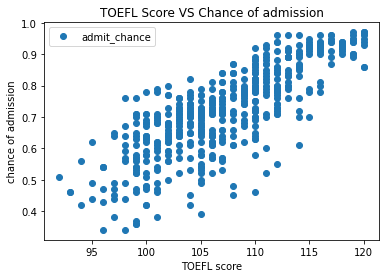

In [63]:
import matplotlib.pyplot as plt

data.plot(x='TOEFL', y='admit_chance', style='o')
plt.title('TOEFL Score VS Chance of admission')
plt.xlabel('TOEFL score')
plt.ylabel('chance of admission')
plt.show()


Once again, we can see that there is a relationship between TOEFL score and chance of admission. Let's perform a multivariate linear regression using both GRE and TOEFL scores as independent variables.

In [64]:
X = data[['GRE', 'TOEFL']].values
y = data['admit_chance'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression()

It is interesting at this point to check the coefficients used by our model, as they indicate how heavily each independent variable contributes to the dependent variable

In [65]:
regressor.coef_


array([0.00641501, 0.00867603])

In this case, we can see that a single point change in your Toefl score would influence your chances slightly more than a similar 1 point change in GRE scores. 

At this point, let's compare our predicted results to the actual data from the test set:


In [66]:
y_pred = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame#.describe()


,Actual,Predicted
0,0.64,0.722459
1,0.85,0.811112
2,0.80,0.785084
3,0.91,0.873369
4,0.68,0.578700
...,...,...
95,0.95,0.950717
96,0.64,0.674925
97,0.53,0.621712
98,0.48,0.612668


Slight improvements! This should be echoed in our key metrics being smaller than our single variable linear model

In [67]:
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.05848723572540899
Mean Squared Error: 0.006246893942643229
Root Mean Squared Error: 0.07903729463135253


In [68]:
X_test

array([[318, 106],
       [321, 114],
       [321, 111],
       [328, 116],
       [301, 102],
       [314, 105],
       [298, 101],
       [302, 110],
       [297, 100],
       [324, 105],
       [317, 103],
       [320, 104],
       [314, 102],
       [313, 109],
       [334, 117],
       [297,  96],
       [323, 110],
       [317, 106],
       [326, 108],
       [300, 105],
       [295,  99],
       [320, 104],
       [296, 101],
       [331, 116],
       [322, 110],
       [318, 110],
       [325, 114],
       [311,  98],
       [306, 100],
       [304, 100],
       [316, 103],
       [296,  99],
       [301, 106],
       [323, 110],
       [315, 105],
       [298, 101],
       [328, 108],
       [324, 113],
       [300, 102],
       [310, 104],
       [314, 107],
       [329, 114],
       [330, 116],
       [316, 110],
       [327, 112],
       [324, 107],
       [333, 119],
       [326, 116],
       [309, 111],
       [314, 106],
       [306, 103],
       [312, 101],
       [305,

In [69]:
# plt.scatter(X_test.shape, y_test, color='red')
# plt.plot(X_test, y_pred, color='black', linewidth=2)
# plt.show()
data.head()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


It is now time for some challenges!

# Challenge 1

Using the same dataset, find out which of the available variables has the largest **weight** in predicting acceptance into university.



In [70]:
Data = data[['GRE', 'TOEFL','uni_rating','SOP','LOR','CGPA','publications']].values
y = data['admit_chance'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       features   vif_Factor
0    Serial No.     4.215632
1           GRE  1542.687799
2         TOEFL  1263.620398
3    uni_rating    21.595270
4           SOP    36.442724
5           LOR    31.949796
6          CGPA  1238.355223
7  publications     3.254613
8  admit_chance   118.691315


In [72]:
X=data.drop(['Serial No.','uni_rating','CGPA','publications','admit_chance'],axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  features   vif_Factor
0      GRE   975.761797
1    TOEFL  1082.144707
2      SOP    25.552870
3      LOR    28.033030


In [73]:
#Find the coef
regressor.coef_

array([0.00641501, 0.00867603])

# Challenge 2

Take a look at this [dataset](https://drive.google.com/file/d/1cctsp46KVzNKGAK0kLl3mY6wRTDlUBp4/view?usp=sharing) on wine quality. You will have to build a multivariate model that predicts the **quality** of the wine, but with a key constraint: you may only use 4 variables from the 11 independent variables available to you. 

How can you pick the 4 most relevant independent variables? recall your learnings from module 1.

Compute your metrics, and compare with your peers. How did each of you achieve their results? 

Hint: recall reduction techniques, you want to pick independent variables that are as unrelated to each other as possible

In [74]:
wine = pd.read_csv('data/winequality-red.csv')
wine #.describe()
#we will use this reading to remove feaures not

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [75]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

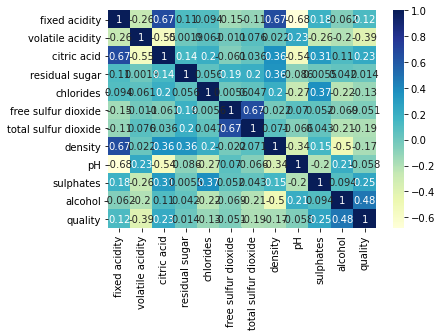

In [76]:
sns.heatmap(wine.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [77]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=wine
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                features   vif_Factor
0          fixed acidity    74.455312
1       volatile acidity    17.960867
2            citric acid     9.192549
3         residual sugar     4.664003
4              chlorides     6.641291
5    free sulfur dioxide     6.460603
6   total sulfur dioxide     6.605274
7                density  1528.154302
8                     pH  1078.171089
9              sulphates    22.462103
10               alcohol   147.616345
11               quality    77.728259


In [79]:
X=wine.drop(['quality','density','pH','alcohol','fixed acidity','volatile acidity','sulphates'],axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

               features  vif_Factor
0           citric acid    2.898228
1        residual sugar    3.802914
2             chlorides    3.522388
3   free sulfur dioxide    5.652490
4  total sulfur dioxide    5.494266


In [80]:
#cols = list(vif['features'])
cols = ['volatile acidity','citric acid','alcohol','sulphates']
cols

['volatile acidity', 'citric acid', 'alcohol', 'sulphates']

In [81]:
X = wine[cols]
y = wine['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [82]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression()

In [83]:
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#At which RMSE is the model well


Mean Absolute Error: 0.48176850659876125
Mean Squared Error: 0.4009263029232798
Root Mean Squared Error: 0.6331874153228882


In [84]:
wine.corr()
cols = ['volatile acidity','citric acid','alcohol','sulphates']

In [85]:
#Check the accuracy 
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score



# print('Accuracy' , accuracy_score(y_test, y_pred))

In [86]:
regressor.coef_

array([-1.33440129, -0.07662679,  0.31487593,  0.67128956])

In [87]:
frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
frame.head()

,Actual,Predicted
1109,6,5.903862
1032,5,4.937523
1002,7,6.488808
487,6,5.195566
979,5,5.712734


In [88]:
frame.describe()

,Actual,Predicted
count,320.000000,320.000000
mean,5.593750,5.672620
std,0.757796,0.482444
min,3.000000,4.556792
25%,5.000000,5.296395
50%,6.000000,5.639756
75%,6.000000,6.015406
max,8.000000,7.138025


In [89]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [91]:
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 72.22% variance. 
# Similarly, the second principal component causes 23.9% variance in the dataset. 
# Collectively we can say that (72.22 + 23.9) 96.21% percent of the classification information contained 
# in the feature set is captured by the first two principal components.
explained_variance

array([0.45587928, 0.23659579, 0.19737778, 0.11014714])

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [93]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[  0   0   2   0   0   0]
 [  0   0   7   4   0   0]
 [  0   0 106  29   0   0]
 [  0   0  51  91   0   0]
 [  0   0   3  24   0   0]
 [  0   0   0   3   0   0]]
Accuracy 0.615625


In [95]:
pcaframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pcaframe.head()

,Actual,Predicted
1109,6,5
1032,5,5
1002,7,6
487,6,5
979,5,5


In [96]:
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 3.1445820250460033
Mean Squared Error: 13.940344257824302
Root Mean Squared Error: 3.733677042517778
